In [1]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests

client = OpenAI()


In [4]:
video = cv2.VideoCapture("data/bison.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")


618 frames read.


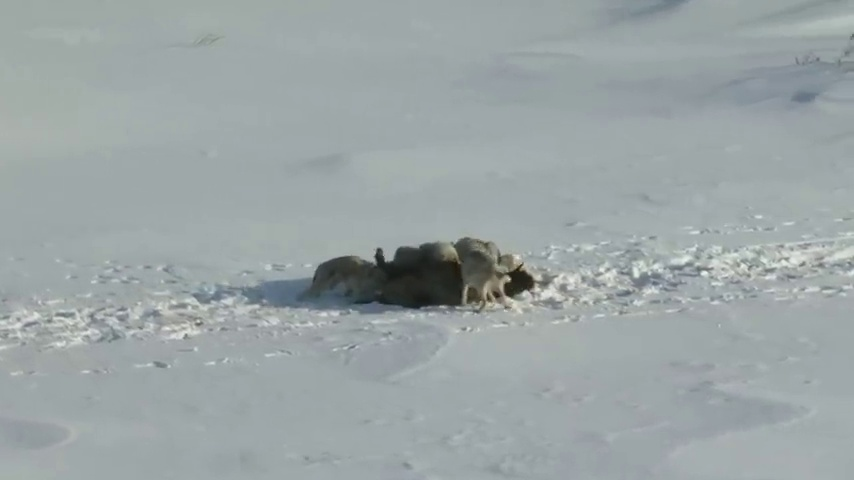

In [5]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)


In [6]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)


Title: The Struggle for Survival: An Intimate Look at a Wolf Pack Hunting in the Winter Wilderness

Description: Dive into the raw and riveting world of nature with our latest video showcasing the fierce and unyielding struggle for survival in the frozen wilderness. Witness a pack of determined wolves as they coordinate a strategic hunt, targeting a lone bison in the snowy landscape. Each frame captures the intense dynamics of predator and prey, providing a gripping view of wildlife in its purest form. From the suspenseful chase over the icy terrain to the adrenaline-fueled confrontations, this video offers a profound glimpse of the natural laws that govern the wild. Observe the wolves' intricate social behavior, teamwork, and resilience against the might and power of the bison. This is nature's drama at its most compelling — raw, unscripted, and awe-inspiring. Join us on this extraordinary journey into the wild, where every moment is a fight for life and every action spells the differ

In [7]:
result

ChatCompletion(id='chatcmpl-8Lqcakwb9eCWbDLQvP3paTbFmbFvb', choices=[Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content="Title: The Struggle for Survival: An Intimate Look at a Wolf Pack Hunting in the Winter Wilderness\n\nDescription: Dive into the raw and riveting world of nature with our latest video showcasing the fierce and unyielding struggle for survival in the frozen wilderness. Witness a pack of determined wolves as they coordinate a strategic hunt, targeting a lone bison in the snowy landscape. Each frame captures the intense dynamics of predator and prey, providing a gripping view of wildlife in its purest form. From the suspenseful chase over the icy terrain to the adrenaline-fueled confrontations, this video offers a profound glimpse of the natural laws that govern the wild. Observe the wolves' intricate social behavior, teamwork, and resilience against the might and power of the bison. This is nature's drama at its most compelling — raw, unscripted,

In [8]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::60]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)


"In the vast, white expanse of the Arctic tundra, a drama unfolds that is as old as life itself. Here, a pack of determined wolves embarks on a formidable hunt. A hulking bison, a giant of these frozen plains, becomes the focus of their attention. With a mix of stealth and strategy, the wolves edge closer, coiled tight with anticipation.

The chase is sudden and explosive. The wolves dart in, their paws sending up clouds of powdery snow. The bison, a formidable adversary, charges, its massive bulk a testament to the harshness of this environment. But the wolves are relentless, their every move is coordinated and precise, honed by generations of natural selection.

As the pursuit twists and turns, the wolves' delicate teamwork contrasts sharply with the brute force of the bison. This dance of predator and prey is intricate and brutal. With each moment, the wolves chip away at the resilience of their quarry, and the bison fights for life with every fiber of its being.

Though this specta

In [9]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
    },
    json={
        "model": "tts-1-1106",
        "input": result.choices[0].message.content,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)